# <center>introduction of machine learning by Hung-yi Lee</center>

## 什么是机器学习？

* 机器学习的比较流行的较严格的定义：
>computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.                 

   也就是说机器能通过以往的学习获得经验，从而提高此类任务的表现。             
   

* 机器学习的感性定义（intuitive）：机器学习其实是一种算法，这种算法通过海量数据，获得输入与输出的近似的映射关系，从而在新的输入上能够获得满意的输出。与传统算法不同的是，机器学习通过喂给程序数据（`data`)和答案(`answer`)，程序输出的是数据和答案的映射关系（`rule`）。而传统算法则是喂给程序映射规则和数据，输出答案。下图是李宏毅老师给出的机器学习值观解释的图片。

![what_is_ML](ML_pic/what_is_ML.PNG)
   <center>机器学习就是学习一个复杂的函数<center>
____
___



## 机器学习的框架

* 模型和相应的函数空间             
我的理解：和许多传统的算法一样，一个问题可以用不同的方法解决，因此在使用机器学习是也需要选则一个合理的机器学习模型，模型的选择和个人对机器学习的理解以及经验有关，需要多多在实践中积累。而一个模型中有许多参数需要确定，最简单的如曲线的二次方拟合，需要有 3 个 参数来确定。每一组参数确定了这个模型下的一个函数，整个参数空间上的所有状态就确定了这个模型下的所有函数，及函数空间。       
 
 
* 机器学习的基本流程                  
![ML_framework](ML_pic/fw.PNG)

   这是一个迭代的过程，不是一次就能成功的，上面的每一个过程都会对最终的学习函数（learner）产生影响。

   

     看下图。

   

   

   ![ML_framework](ML_pic/ML_framework.PNG)
   ___
   ___

## case study

### pokemon 的线性回归模型（详细背景见slides）


#### Step 1 : Build a Linear Model：

$$y=b+\sum w_{i} x_{i}\\                   
     w_i:weights \quad b: bias  $$            
                            
                            
#### Step 2 : Construct a Goodness of Function

**Loss Function**:   $$\begin{equation}
\mathrm{L}(w, b)=\sum_{n=1}^{10}\left(\hat{y}^{n}-\left(b+w \cdot x^{n}\right)\right)^{2}
\end{equation}$$

<center>$\hat y^n$ 为 true value， $x$ 为 features，$w$为 parameter space</center>


#### Step 3 :Using Gradient Descent to Compute the Best Function

![bestfunction](ML_pic/bestfunction.PNG)

在训练集上找到损失函数的最小值参数（优化问题,通常找不到***全局最优解***）

* randomly pick an initial value $\omega^0$(事实上为了防止梯度消失和爆炸，加快学习速度，参数的初始值需要得到控制)             

* compute $\left.\frac{d L}{d w}\right|_{w=w^{0}}$
* select proper learning rate ***$\eta$*** and iteration number(***epoch***)to update parameters
![GradientDescent](ML_pic\GradientDescent.PNG)
![GradientDescent](ML_pic\GradientDescent2.PNG)
___
___

### Overfitting

- What we really care about are errors or accuracies on test set(new data that we haven't seen in training set), not on training set.  Therefore the better performance on training set doesn't mean we have trained a good model to generalize new inputs. The following picture illustrate the relationship between different models.

  ![model_select](ML_pic\model_select.PNG)

- resolve overfitting: **Regularization**

  what is the mean when we speak regularization? My understanding is to get a smoother and well generalized fitting, we need reduce a complex model to a simple one. Thus people using many  approaches like $L_0, L_1, L_2$ to reduce parameters to 0 or small number so we can find important hidden factors and improve the performance on test set.

  Why don't we select a simple model in advance? That is `we don't know what important factors are in advance`. Therefore we consider various factors and using regularization to find by machine **itself**.

  - $L_0$ : the number of non-zero parameters(really hard to optimize)

  - $L_1$ : the sum of magnitude of parameters(hard to optimize due to non-differentiable )

    ![L1re](ML_pic\L1re.PNG)

  - $L_2$ :  euclidean distances(most popular and easiest)

![L2re](ML_pic\L2re.PNG)



___
___

### 梯度下降算法优化的重要性
使用单纯的梯度下降可导致算法不收敛或者收敛很慢，需要运用梯度以外的信息，比如基于 Hession Matrix 动态调整各个参数的学习速率，以获得良好的精度和速度。
可以参考： https://www.deeplearningbook.org/contents/numerical.html
下面是Adagrad的简单示范（视频里的例子）

Mini point: b = -188.3668387495323 w = 2.6692640713379903


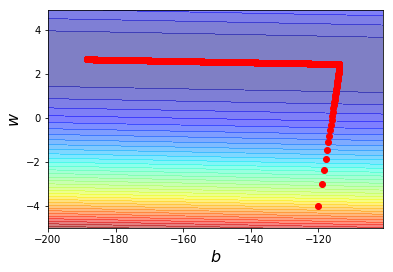

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_data=[338, 333, 328, 207, 226, 25, 179, 60, 208, 606]
y_data=[640, 633, 619, 393, 428, 27, 193, 66, 226, 1591]

## 损失函数等高线图
space_w  =  np.arange(-5,5,0.1)
space_b  =  np.arange(-200,-100,1)
space_B,space_W = np.meshgrid(space_b,space_w)

loss = np.zeros_like(space_W)

for i in range(len(x_data)): 
        loss += (y_data[i] - space_W * x_data[i] - space_B)**2
loss /= len(x_data)


b=-120
w=-4
lr=1                
iteration=100000    

b_history=[b]       
w_history=[w]       

lr_b=0
lr_w=0

for i in range(iteration):
    
    b_grad=0.0  
    w_grad=0.0  

    for n in range(len(x_data)):

        b_grad = b_grad -2.0*(y_data[n] - b - w*x_data[n])

        w_grad = w_grad -2.0*(y_data[n] - b - w*x_data[n])*x_data[n]

    lr_b = lr_b + b_grad **2
    lr_w = lr_w + w_grad **2

    b = b - lr/np.sqrt(lr_b)*b_grad # Adagrad
    w = w - lr/np.sqrt(lr_w)*w_grad

    

    b_history.append(b)
    w_history.append(w)

## plot figure
plt.contourf(space_B,space_W,loss,50,alpha=0.5, cmap=plt.get_cmap('jet'))
print("Mini point: b =",b_history[-1],"w =",w_history[-1])
plt.plot(b_history, w_history, 'ro')
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()